In [1]:
'''
Read Audio files in Python (librosa)
Visualize data
'''

'\nRead Audio files in Python (librosa)\nVisualize data\n'

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lr
from librosa.display import specshow
from glob import glob

In [41]:
def files_name(path):
    '''
    Get all the files name in a list of data to read
    '''
    return glob(path + '/*.wav')

In [42]:
audio_files = files_name('./sound_data')

In [43]:
def read_file(path):
    '''
    Read one data and return the audio and the rate
    '''
    return lr.load(path)

In [44]:
def read_files(paths):
    '''
    Read multiple files from path list
    '''
    res = []
    for p in paths:
        audio, rate = read_file(p)
        res.append(audio)
    return np.array(res), rate

In [45]:
audio, rate = read_file(audio_files[0])

In [54]:
audios = read_files(audio_files)
signals = audios[0]
rate = audios[1]

In [47]:
def plot_one_audio(audio, rate):
    '''
    Plot one audio according to the floating audio vector and the rate
    '''
    time = np.arange(len(audio)) / rate ## time vector

    fig, ax = plt.subplots()
    ax.plot(time, audio)
    ax.set(xlabel='Time (s)', ylabel='Amplitude')
    plt.show()

In [48]:
def plot_audios(audios, rate):
    '''
    Plot from multiple audio
    Audios: list au audio content
    rate: rate for all audio
    '''
    for a in audios:
        plot_one_audio(a, rate)

In [102]:
def plot_harm_perc(signal, rate):
    '''
    Plot harmonic and percusive components
    '''
    harm, perc = lr.effects.hpss(signal)
    plt.subplot()
    librosa.display.waveplot(harm, sr=rate, alpha=0.25)
    librosa.display.waveplot(perc, sr=rate, color='r', alpha=0.5)
    plt.title('Harmonic + Percussive')
    plt.tight_layout()
    plt.show()

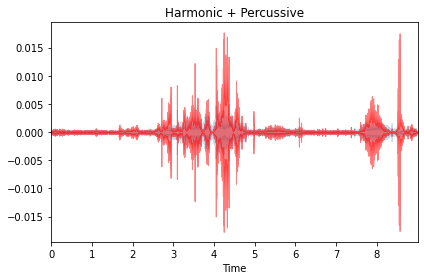

In [103]:
plot_harm_perc(audio, rate)

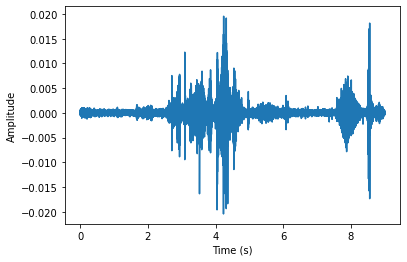

In [49]:
plot_one_audio(audio, rate)

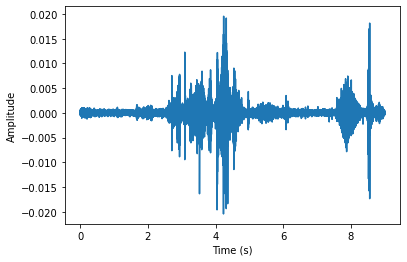

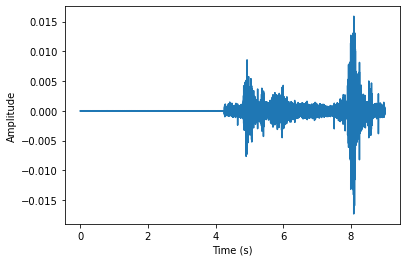

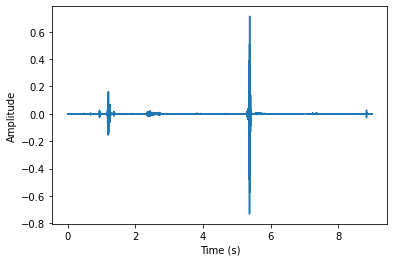

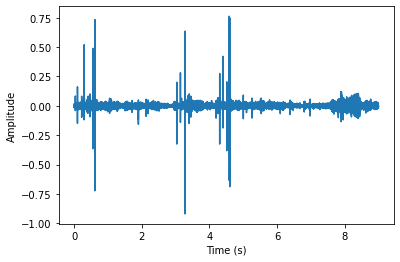

In [55]:
plot_audios(signals, rate)

In [88]:
mfccs = lr.feature.mfcc(y=signals[0], sr=rate)
signal = signals[0]

In [95]:
def plot_mfccs(mfccs):
    '''
    Plot the Mel Frequency Cepstral Coef
    '''
    plt.figure(figsize=(10, 4))
    specshow(mfccs, x_axis='time')
    plt.title('Mfcc')
    plt.tight_layout()
    plt.show()
    
def plot_spec(signal):
    '''
    Plot the Linear Frequency Spectrum
    '''
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    plt.figure(figsize=(10, 4))
    specshow(D, y_axis='linear', x_axis='time')
    plt.title('Linear-frequency power spectrogram')
    plt.tight_layout()
    plt.show()

def plot_spec_log(signal):
    '''
    Plot the Log Frequency Spectrum
    '''
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    plt.figure(figsize=(10, 4))
    specshow(D, y_axis='log', x_axis='time')
    plt.title('Log-frequency power spectrogram')
    plt.tight_layout()
    plt.show()

def plot_spec_chroma(signal, rate):
    '''
    Plot the Chromogram
    '''
    C = librosa.feature.chroma_cqt(y=signal, sr=rate)
    plt.figure(figsize=(10, 4))
    specshow(C, y_axis='chroma')
    plt.title('Chromagram')
    plt.tight_layout()
    plt.show()

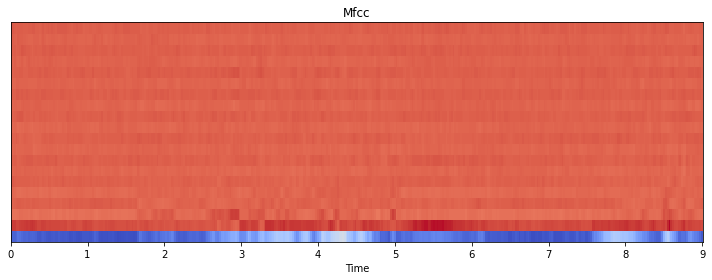

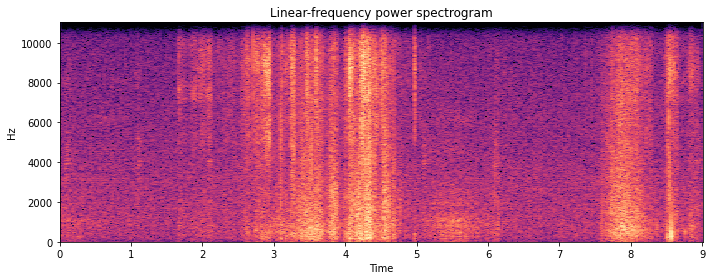

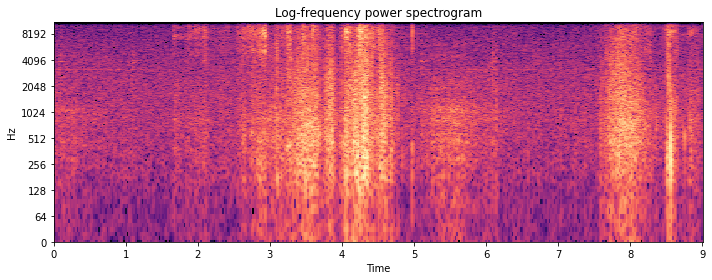

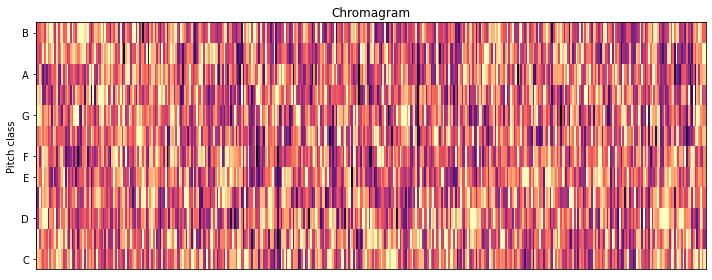

In [96]:
plot_mfccs(mfccs)
plot_spec(signal)
plot_spec_log(signal)
plot_spec_chroma(signal, rate)